# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно  определить рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание проекта**

**Данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.\
Наша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.\
О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.**


**Описание данных**

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)\
balcony — число балконов\
ceiling_height — высота потолков (м)\
cityCenters_nearest — расстояние до центра города (м)\
days_exposition — сколько дней было размещено объявление (от публикации до снятия)\
first_day_exposition — дата публикации\
floor — этаж\
floors_total — всего этажей в доме\
is_apartment — апартаменты (булев тип)\
kitchen_area — площадь кухни в квадратных метрах (м²)\
last_price — цена на момент снятия с публикации\
living_area — жилая площадь в квадратных метрах (м²)\
locality_name — название населённого пункта\
open_plan — свободная планировка (булев тип)\
parks_around3000 — число парков в радиусе 3 км\
parks_nearest — расстояние до ближайшего парка (м)\
ponds_around3000 — число водоёмов в радиусе 3 км\
ponds_nearest — расстояние до ближайшего водоёма (м)\
rooms — число комнат\
studio — квартира-студия (булев тип)\
total_area — общая площадь квартиры в квадратных метрах (м²)\
total_images — число фотографий квартиры в объявлении\

### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


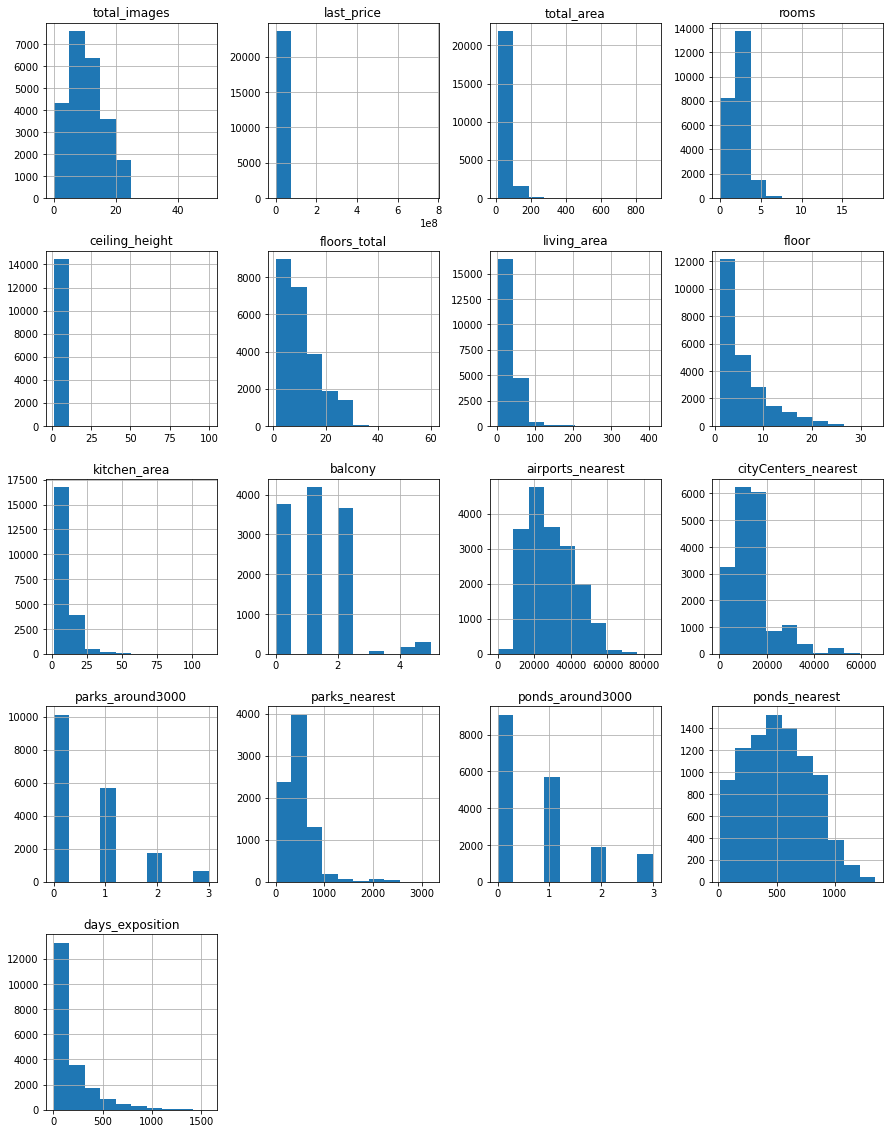

In [5]:
data.hist(figsize=(15, 20));

*Общая предварительная оценка данных: набор данных достаточен для интеллектуального анализа, но есть пропуски, аномалии и выбросы, присутствуют явные и неявные дубликаты, неправильные типы. Как говорится "Мусор на входе - мусор на выходе" займемся качеством данных, начнем с предобработки:*

### Предобработка данных

**2.1 ИССЛЕДОВАНИЕ ПРОПУСКОВ В ДАННЫХ**

*Выведем количество пропущенных значений для каждого столбца датафрейма.*

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
total_images,0.0
last_price,0.0
total_area,0.0
first_day_exposition,0.0
rooms,0.0
ceiling_height,38.8
floors_total,0.4
living_area,8.0
floor,0.0
is_apartment,88.3


<p>
<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>


Удобно было бы сразу вывести долю пропусков. Так мы увидим, что можно отбросить, а с чем надо работать. Пример кода:
    
    pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

<div class="alert alert-info"> Спасибо, очень наглядно. Буду использовать =) 
<b>

<p>
<div class="alert-success">
<b>Комментарий ревьюера 2 ✔️</b>

    
Я рада :) </div>

*Больше всего пропусков допущено продавцами квартир при составлении объявления и  связано с осутствием некоторых характеристик (не придали значения, не помнят, и т.д.) продаваемого жилья: при 100% заполнении total_area, в столбцах жилая площадь, площадь кухни (living_area, kitchen_area) есть пропуски. Еще больше в высоте потолков  и количестве балконов (ceiling_height, balcony) - во всех мы найдем закономерности и дополним недостающие данные. Апартаменты (is_apartment) объекты коммерческой недвижимости без воможности оформления постоянной регистрации нас интересуют в меньшей степени. Парки и пруды в радиусе 3 км, повышают стоимость жилья, если не указаны, то вероятно их и нет. Картографические данные (airports_neares, cityCenters_nearest, parks_nearest и ponds_nearest) автоматически подгружаются при указании локации продаваемого жилья, здесь вопрос к програмному обесечению или выгрузке-передаче данных*

<p>
<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

    
👍</div>

*Пропусков в rooms нет, посмотрим с каким жильем имеем дело. Выведем количество квартир в зависимости от комнат:*

In [8]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

*Лидируют, как обычно однокомнатные, далее по убыванию. Вероятно "0" озачает "студия", посмотрим на площадь квартир с количеством комнат больше "8"*

In [9]:
data.query('rooms >8')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
648,3,17500000.0,183.7,2018-07-01T00:00:00,11,3.40,7.0,138.8,7,NaN,...,13.3,NaN,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
866,5,25000000.0,363.0,2017-12-23T00:00:00,14,3.16,5.0,222.0,4,NaN,...,16.6,NaN,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
4149,6,23000000.0,272.6,2018-01-11T00:00:00,10,3.14,7.0,145.9,7,NaN,...,18.8,1.0,Санкт-Петербург,10726.0,12169.0,1.0,191.0,1.0,531.0,NaN
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,NaN,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
8822,14,49968900.0,398.0,2017-07-12T00:00:00,9,3.00,2.0,160.1,1,False,...,41.0,NaN,Санкт-Петербург,17720.0,16722.0,3.0,471.0,2.0,440.0,471.0
8860,12,17000000.0,235.0,2018-07-14T00:00:00,9,3.00,6.0,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,24466.0,5034.0,1.0,346.0,0.0,NaN,90.0
9550,10,23500000.0,313.0,2017-02-13T00:00:00,9,3.20,6.0,179.2,5,NaN,...,13.2,NaN,Санкт-Петербург,38435.0,10138.0,1.0,146.0,0.0,NaN,NaN
9688,8,33000000.0,194.1,2017-02-07T00:00:00,11,3.43,5.0,129.0,2,NaN,...,11.9,NaN,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0
13019,0,22250000.0,249.9,2019-04-23T00:00:00,9,3.20,5.0,157.0,5,NaN,...,12.4,NaN,Санкт-Петербург,10328.0,9987.0,2.0,352.0,0.0,NaN,NaN
13397,14,19500000.0,309.7,2016-02-03T00:00:00,9,NaN,5.0,199.0,5,NaN,...,14.3,0.0,Санкт-Петербург,10328.0,9987.0,2.0,352.0,0.0,NaN,468.0


*Площадь от 187 до 900 м2, достаточно для "многокомнатных".*

*Посчитаем количество квартир студий, помним 197 соответствовало количеству комнат "0".*

In [10]:
data.loc[data['studio'] == True]['studio'].count()

149

*Выведем наглядный срез по студиям:*

In [11]:
data.query('studio == True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
697,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.50,21,NaN,...,NaN,NaN,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.00,1,NaN,...,NaN,0.0,посёлок Шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000.0,30.00,2017-12-17T00:00:00,0,NaN,25.0,18.20,5,NaN,...,NaN,NaN,Санкт-Петербург,35250.0,16414.0,0.0,NaN,1.0,400.0,211.0
22877,2,4280000.0,28.00,2017-10-26T00:00:00,0,2.70,19.0,18.00,10,NaN,...,NaN,NaN,Санкт-Петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,NaN,25.0,18.00,16,NaN,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,NaN,19.0,NaN,8,NaN,...,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0


*Проверим и квартиры "без комнат":*

In [12]:
data.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,NaN,24.0,15.50,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,NaN,14.0,17.00,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,NaN,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,NaN,26.0,24.30,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,NaN,10.0,NaN,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000.0,26.00,2017-09-01T00:00:00,0,NaN,25.0,18.00,16,NaN,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000.0,27.70,2017-09-28T00:00:00,0,NaN,24.0,18.00,4,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000.0,26.00,2018-09-07T00:00:00,0,NaN,19.0,NaN,8,NaN,...,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000.0,29.00,2017-11-11T00:00:00,0,NaN,9.0,18.00,8,NaN,...,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


*Площадь от 17 до 34 м2, это действительно квартиры студии*

*Теперь посчитаем апартаменты...*

In [13]:
data.loc[data['is_apartment'] == True]['is_apartment'].count()  #data.query('is_apartment == True')

50

 *...и квартиры свободной планировки*

In [14]:
data.loc[data['open_plan'] == True]['open_plan'].count()

67

*Апартаменты (жильё без возможности прописаться) и квартиры свободной планировки (требующие финансовых вложений) нерелевантны и составляют в сумме 0.49% от общего количества исследуемых квартир, следовательно не представляют ценности для нашего анализа. Удаляем 117 строк и столбцы 'is_apartment' и 'open_plan'*

In [15]:
data = data[data['is_apartment'] != True]
data = data[data['open_plan'] != True]
data = data.drop(columns=['is_apartment', 'open_plan'], axis=1)

*data.info(): 23582 entries, total 20 columns*

*Исправим стиль в заголовках столбцов*

In [16]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3', 'ponds_around3000': 'ponds_around_3'})

<p>
<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

    
👍</div>

**2.2 ЗАПОЛНЕНИЕ ПРОПУСКОВ В ДАННЫХ**

 *Выведем количество пропущенных значений.*


In [17]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9137
floors_total               86
living_area              1890
floor                       0
studio                      0
kitchen_area             2196
balcony                 11487
locality_name              49
airports_nearest         5503
city_centers_nearest     5482
parks_around_3           5481
parks_nearest           15533
ponds_around_3           5481
ponds_nearest           14526
days_exposition          3169
dtype: int64

*Пропуски: жилая площадь, площадь кухни и высоту потолков  заполним медианными значениями аналогичных квартир сгруппированных по каждому типу из столбца "rooms", это будет наиболее вероятным при высоком разнообразии планировок.
Недостающие всего этажей в доме floors_total возьмем из столбца floor*   

In [18]:
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('rooms')['ceiling_height'].transform('median'))
data['floors_total']= data['floors_total'].fillna(data['floor'])

In [19]:
#data['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_area'].transform('median'))
#data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('rooms')['kitchen_area'].transform('median'))

In [20]:
#data[data['living_area'] > data['total_area']]

In [21]:
#coeff_la = data['total_area'].mean()/data['living_area'].mean()

*Пропуски в жилой площади посчитаем разделив общую площадь на коэффициент. Чтобы посчитать коэффициент, поделим среднее значение общей площади на среднее значение из имеющихся данных по жилой площади.*

In [22]:
data['living_area'] = data['living_area'].fillna(data['total_area']/(data['total_area'].mean()/data['living_area'].mean()))

*Пропуски площади кухни заполним , найдя коэффициент - отношение нежилой площади к площади кухни по всему датасету*

In [23]:
coeff_ka = ((data['total_area'] - data['living_area']) / data['kitchen_area']).mean()

In [24]:
data['kitchen_area'] = data['kitchen_area'].fillna((data['total_area'] - data['living_area']) / coeff_ka)

<p>
<div class="alert-danger">
<b>Комментарий ревьюера ❌</b>

- Пропуски в столбцах `ceiling_height` и `floors_total` заполнены верно. 

- При такой замене `living_area` появились квартиры, в которых жилая площадь больше, чем общая площадь. Вот так можно их посмотреть:

    
    data[data['living_area'] > data['total_area']]
    
Пропуски в жилой площади стоит посчитать разделив общую площадь на коэффициент. Чтобы посчитать коэффициент, подели среднее значение  общей площади на среднее значение из имеющихся данных по жилой площади.
    
- При такой замене `kitchen_area` увеличилось количество квартир, в которых сумма жилой площади и площади кухни больше, чем общая площадь. Для того, чтобы заполнить пропуски, можно найти отношение нежилой площади к площади кухни по всему датасету и использовать его. Нежилая площадь – это площадь общая без площади жилой (в нее входит кухня, санузлы, коридоры и кладовки)

Проверь, пожалуйста, ошибки:
    
    data[['kitchen_area', 'living_area','total_area']][(data['kitchen_area'] + data['living_area']) > data['total_area']]

<p>
<div class="alert-danger">
<b>Комментарий ревьюера 2 ❌</b> 
    
Ошибка в формуле заполнения пропусков площади кухни, на коэффициент нужно поделить, а не умножить

</div>

<div class="alert alert-info">
<b>
Извиняюсь, за такую ошибку =(

<p>
<div class="alert-success">
<b>Комментарий ревьюера 3 ✔️</b>

    
👍</div>

*Продавец не указал число балконов, скорее всего, в его квартире их и нет.
Исключим и ошибочные заполнения площади кухни в квартирах студиях:*

In [25]:
data['balcony']= data['balcony'].fillna(0)
data.loc[data['studio']==True, 'kitchen_area'] = 0

<p>
<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

    
👍</div>

*К пропускам расстояний до центра, аэропортов и парков вернемся позднее, после пребразования названий населенных пунктов*

**2.3 ИЗМЕНЕНИЕ ТИПОВ ДАННЫХ**

*Для выполнения операции с датами, сообщим pandas, через атрибут dt - что тип данных, к которым будут применены методы — datetime. Чтобы округлить время, применим метод dt.round().*

In [26]:
# округляем до ближайшего значения с шагом в один час
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M')
data['first_day_exposition'] = data['first_day_exposition'].dt.round('1H')

<p>
<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

    
👍</div>

*Число балконов и этажей не может быть дробным. Заменим вещественный тип данных в столбцах floors_total и  balcony на целочисленный с помощью метода astype().* 

In [27]:
data['balcony'] = data['balcony'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)

<p>
<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

    
👍</div>

**2.4 ОБРАБОТКА НЕЯВНЫХ ДУБЛИКАТОВ**

*Изучим уникальные значения в столбце с названиями (locality_name) и устраним неявные дубликаты. Преобразуем разные названия одних и тех же населенных пунктов  в один тип*

In [28]:
#предварительно заменим 49 пропусков в столбце locality_name и сбросим индексы в DataFrame
data['locality_name'] = data['locality_name'].fillna(value='')
data.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3,parks_nearest,ponds_around_3,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,False,25.000000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.64,11,18.600000,1,False,11.000000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.60,5,34.300000,4,False,8.300000,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,90.794946,9,False,27.017670,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,False,41.000000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23577,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.300000,3,False,13.830000,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23578,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.000000,4,False,8.500000,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23579,18,2500000.0,56.70,2018-02-11,2,2.60,3,29.700000,1,False,10.695352,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23580,13,11475000.0,76.75,2017-03-28,2,3.00,17,43.827120,12,False,23.300000,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [29]:
data['locality_name'].sort_values().unique()

array(['', 'Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок С

In [30]:
data['locality_name'].describe()

count               23582
unique                363
top       Санкт-Петербург
freq                15649
Name: locality_name, dtype: object

*363 "уникальных" названия  содержат дубликаты, к примеру "посёлок Мурино" записан по разному: "поселок Мурино, посе(ё)лок городского типа Мурино, деревня или просто Мурино", изключим лишние слова*

In [31]:
#создадим список "лишних"обозначений
excess_name = [
    'садоводческое некоммерческое товарищество', 'посёлок при железнодорожной станции', 'посёлок городского типа', 
'поселок городского типа', 'садовое товарищество', 'поселок станции', 'посёлок станции', 'городской поселок', 'городской посёлок', 
'коттеджный поселок', 'коттеджный посёлок', 'деревня', 'поселок', 'посёлок', 'село'
]
#функция, которая оставит только название
def clarif_name(locality_name):
    for i in excess_name:
        if i in locality_name:
            return locality_name.replace(i,'')
    return locality_name

data['locality_name'] = data['locality_name'].apply(clarif_name)
data['locality_name'].sort_values().unique()

array(['', ' Агалатово', ' Александровская', ' Алексеевка', ' Аннино',
       ' Аро', ' Барышево', ' Батово', ' Бегуницы', ' Белогорка',
       ' Белоостров', ' Большая Вруда', ' Большая Ижора',
       ' Большая Пустомержа', ' Большие Колпаны', ' Большое Рейзино',
       ' Большой Сабск', ' Бор', ' Борисова Грива', ' Бугры', ' Будогощь',
       ' Ваганово', ' Важины', ' Вартемяги', ' Вахнова Кара', ' Вещево',
       ' Виллози', ' Вознесенье', ' Возрождение', ' Войсковицы',
       ' Войскорово', ' Володарское', ' Вырица', ' Выскатка',
       ' Высокоключевой', ' Гаврилово', ' Гарболово', ' Гладкое',
       ' Глажево', ' Глебычево', ' Глинка', ' Гончарово', ' Горбунки',
       ' Гостилицы', ' Громово', ' Дзержинского', ' Дружная Горка',
       ' Дружноселье', ' Дубровка', ' Елизаветино', ' Ефимовский',
       ' Жилгородок', ' Жилпосёлок', ' Житково', ' Заводской',
       ' Заклинье', ' Заневка', ' Запорожское', ' Зимитицы', ' Извара',
       ' Ильичёво', ' Иссад', ' Калитино', ' Каложицы

<p>
<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

    
Стоит вывести, сколько теперь уникальных значений </div>

**2.5 ОБРАБОТКА И УДАЛЕНИЕ АНОМАЛИЙ**

*С помощью describe() получим основные количественные характеристики столбца ceiling_height* 

In [32]:
data['ceiling_height'].describe()

count    23581.000000
mean         2.714583
std          0.716308
min          1.000000
25%          2.600000
50%          2.640000
75%          2.700000
max         32.000000
Name: ceiling_height, dtype: float64

*Потолок высотой 32! м, это с 10 этажный дом, такое невероятно. Что ж, посмотрим на единственную квартиру, оставшуюся после типового присвоения медианных значений:*

In [33]:
data[data['ceiling_height'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3,parks_nearest,ponds_around_3,ponds_nearest,days_exposition
14498,6,32250000.0,374.6,2018-06-09,19,NaN,5,264.5,2,False,27.6,0,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0


*374,6 м2, 19 комнат, 3,5 км до центра: квартира премиум сегмента, неудивительно что она оказалась единственной. Возможно продавец не прописал высоту потолков по причине разнообразия высот и наличия "второго света"? Скорее всего да. Но такая квартира выбивается из нашего анализа, мы её удаляем с помошью метода dropna()*

In [34]:
data = data.dropna(subset=['ceiling_height'])

*Посчетаем количество квартир с потолками 8 м и выше с помощью среза query()*

In [35]:
data.query('ceiling_height >= 8')['ceiling_height'].count()

25

*Таких аномальных квартир немного, и природа ошибок непонятна, удаление не повлияет на общий анализ. Перезапишем DataFrame с помощью среза query()*

In [36]:
data.shape[0]

23581

In [37]:
data = data.query('ceiling_height <= 8')

In [38]:
data.shape[0]

23559

*В общей сложности жильё с аномально высокими потолками составляло 0.093%*

<p>
<div class="alert-success">
<b>Комментарий ревьюера 2 ✔️</b>

    
Отлично 👍 После удаления выбросов стоит посчитать, сколько процентов данных было удалено. Для этого раздели количество строк в датафрейме с отфильтрованными значениями на количество строк исходного датафрейма. Для этого хорошо подойдет атрибут `shape[0]`. Удалять стоит не более 10% данных.

### Посчитаем и добавим в таблицу новые столбцы

*Посчитаем и добавим в DataFrame новый столбец price_meter стоимость одного м2 - основную ценовую характеристику объекта*

In [39]:
data['price_meter'] = data['last_price'] / data['total_area']
data['price_meter'] = data['price_meter'].astype('int')
data['price_meter'].head()

0    120370
1     82920
2     92785
3    408176
4    100000
Name: price_meter, dtype: int64

*Последовательно добавим в DataFrame день недели, месяц и год публикации объявления*

In [40]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

*Распределим квартиры по типу этажей, «первый», «последний», «другой» и добавим столбец floor_type в DataFrame*

In [41]:
#создадим функцию распределения этажности квартир по типам
def type_f(row):
#пременные со значениями этажей
    ft = row['floors_total']
    f = row['floor']
    
    if f == 1:
        return 'первый'
    if f == ft:
        return 'последний'
    else:
        return 'другой'

# применим функцию методом apply()
data['floor_type'] = data.apply(type_f, axis=1)

<p>
<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

    
👍</div>

*Расстояние до центра города 'city_centers_nearest' округлим и переведем из метров в км*

In [42]:
data['city_centers_nearest'] = data['city_centers_nearest'] / 1000
data['city_centers_nearest'] = data['city_centers_nearest'].round()

<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>


Огруглить лучше после деления на 1000

<div class="alert-warning">
<b>Комментарий ревьюера 2 ⚠️</b>

    
Округление столбца не получилось, ты его просто вывел на экран, а нужно перезаписать столбец

<div class="alert alert-info">
<b>
Исправил

<p>
<div class="alert-success">
<b>Комментарий ревьюера 3 ✔️</b>

    
👍</div>

*Пропущенные значения заполним медианами типовых аналогов сгруппированных по солбцу 'locality_name'*

In [43]:
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(data.groupby('locality_name')['city_centers_nearest'].transform('median'))

*По аналогии поступим и с расстояниями до парков и аэропортов*

In [44]:
data['airports_nearest'] = data['airports_nearest'].fillna(data.groupby('locality_name')['airports_nearest'].transform('median'))
data['parks_nearest'] = data['parks_nearest'].fillna(data.groupby('locality_name')['parks_nearest'].transform('median'))

*Выведем DataFrame на экран*

In [45]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,parks_around_3,parks_nearest,ponds_around_3,ponds_nearest,days_exposition,price_meter,weekday,month,year,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.64,11,18.600000,1,False,...,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.60,5,34.300000,4,False,...,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,90.794946,9,False,...,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой


<p>
<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

    
👍</div>

### Проведем исследовательский анализ данных

*4.1 Первым делом избавимся от недостоверных, заметных, еще при предобработке данных. Стоимость квадратного метра - самый характерный для формирования среза показатель*

<AxesSubplot:>

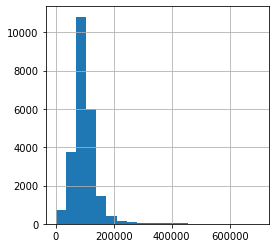

In [46]:
data['price_meter'].hist(bins=20, range = (0, 700000), figsize=(4, 4))#гистограмма

<AxesSubplot:xlabel='city_centers_nearest', ylabel='price_meter'>

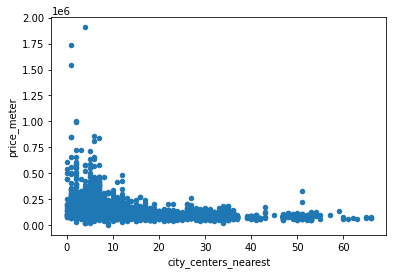

In [47]:
data.plot(x='city_centers_nearest',y='price_meter',kind='scatter') #диаграмма рассеяния 

*Ожидаемое распределение стоимости м2 - гистограмма с пиком в районе центра города и длинным хвостом на удалении*

<AxesSubplot:>

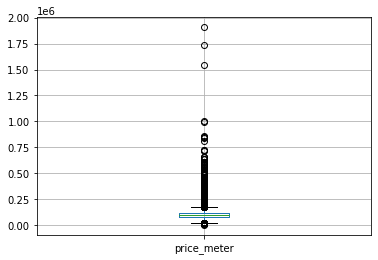

In [48]:
data.boxplot(column='price_meter')#диаграмма размаха

*"Ящик с усами" демонстрирует насколько велик "размах" выбросов. Нижний "ус" упирается в 0, верхний заканчивается около 200000. Изменим масштаб по вертикальной оси* 

(0.0, 200000.0)

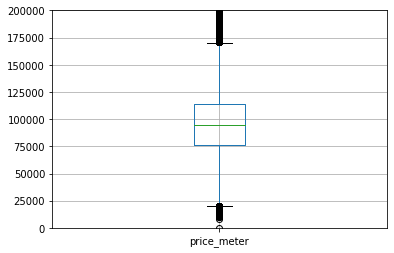

In [49]:
data.boxplot(column='price_meter',grid=True)#диаграмма размаха
plt.ylim(0, 200000)

In [50]:
data['price_meter'].describe()# числовое описание данных показывает насколько значения неоднородны

count    2.355900e+04
mean     9.930792e+04
std      5.007926e+04
min      1.110000e+02
25%      7.655750e+04
50%      9.493600e+04
75%      1.141505e+05
max      1.907500e+06
Name: price_meter, dtype: float64

*Стандартное отклонение 50000! и разброс от 111 до 1 907 500 за м2. Значения за пределами межквартильного размаха являются выбросами, сделаем срез нужного нам участка для дальнейшего анализа*

In [51]:
df = data.query('15000 < price_meter < 175000')

In [52]:
df.reset_index(drop=True)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,studio,...,parks_around_3,parks_nearest,ponds_around_3,ponds_nearest,days_exposition,price_meter,weekday,month,year,floor_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00000,8,False,...,1.0,482.0,2.0,755.0,NaN,120370,3,3,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,2.64,11,18.60000,1,False,...,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,2.60,5,34.30000,4,False,...,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другой
3,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00000,13,False,...,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой
4,10,2890000.0,30.40,2018-09-10,1,2.64,12,14.40000,5,False,...,NaN,NaN,NaN,NaN,55.0,95065,0,9,2018,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22663,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.30000,3,False,...,1.0,796.0,3.0,381.0,NaN,72490,1,3,2017,другой
22664,14,3100000.0,59.00,2018-01-15,3,2.65,5,38.00000,4,False,...,NaN,NaN,NaN,NaN,45.0,52542,0,1,2018,другой
22665,18,2500000.0,56.70,2018-02-11,2,2.60,3,29.70000,1,False,...,NaN,NaN,NaN,NaN,NaN,44091,6,2,2018,первый
22666,13,11475000.0,76.75,2017-03-28,2,3.00,17,43.82712,12,False,...,2.0,173.0,3.0,196.0,602.0,149511,1,3,2017,другой


*Данных стало на 3.78% меньше, зато какой прирост в качестве!*

<p>
<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

    
👍</div>

**4.2 ИЗУЧИМ И ОПИШЕМ ГЛАВНЫЕ  ХАРАКТЕРИСТИКИ ОБЪЕКТОВ ЖИЛОЙ НЕДВИЖИМОСТИ**

**

**Общая площадь:**

<AxesSubplot:>

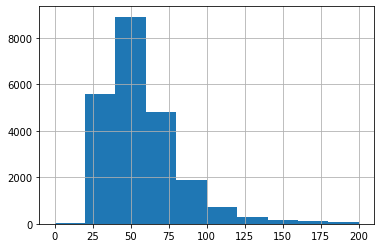

In [53]:
df['total_area'].hist(bins=10, range = (0, 200))

In [54]:
df['total_area'].describe()

count    22668.000000
mean        58.338853
std         30.467592
min         13.000000
25%         40.000000
50%         51.000000
75%         67.900000
max        590.000000
Name: total_area, dtype: float64

*В продаже недвижимость общей площадью от 13 до 590 м2, в основном продается жилье от 40 до 60 м2.Среднее и медианное значение общей площади 58 и 51 м2 соответственно* 

**Жилая площадь**

<AxesSubplot:>

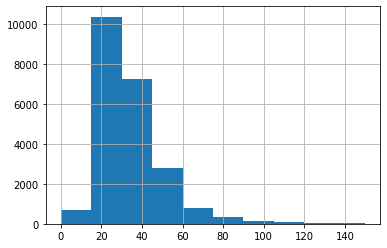

In [55]:
df['living_area'].hist(bins=10, range = (0, 150))

In [56]:
df['living_area'].describe()

count    22668.000000
mean        33.522354
std         19.690824
min          2.000000
25%         18.900000
50%         30.000000
75%         41.800000
max        409.000000
Name: living_area, dtype: float64

*В продаже недвижимость жилой площадью от 19 до 409 м2, в основном продается жилье от 20 до 30 м2.Среднее и медианное значение общей площади 33 и 30 м2 соответственно* 

**Площадь кухонь**

<AxesSubplot:>

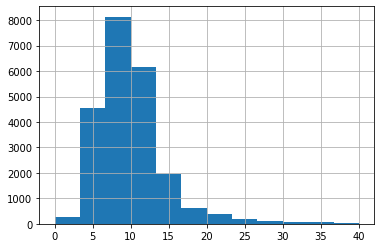

In [57]:
df['kitchen_area'].hist(bins=12, range = (0, 40))

In [58]:
df['kitchen_area'].describe()

count    22668.000000
mean        10.079648
std          5.202527
min          0.000000
25%          7.000000
50%          9.000000
75%         11.500000
max        100.700000
Name: kitchen_area, dtype: float64

*Большая часть кухонь имеет площадь 8-10 м2, среднее 10 и медиана 9 м2*

**Цена объектов**

<AxesSubplot:>

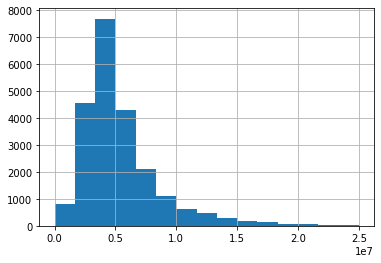

In [59]:
df['last_price'].hist(bins=15, range = (-1000, 25000000))

In [60]:
df['last_price'].describe()

count    2.266800e+04
mean     5.549196e+06
std      3.827446e+06
min      4.900000e+05
25%      3.400000e+06
50%      4.550000e+06
75%      6.499000e+06
max      6.500000e+07
Name: last_price, dtype: float64

*Цена большей части квартир 3,5 - 5 млн. руб., средняя и медиана 5,549 и 4,550 млн.руб. соответственно.*  

**Количество комнат**

<AxesSubplot:>

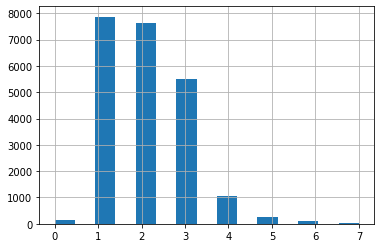

In [61]:
df['rooms'].hist(bins=15, range = (0, 7))

*Более 7,8 тыс. предложений 1 комнатных квартир, немногим меньше - 7,6 тыс. двухкомнатных, далее 5,5 тыс. трех и чуть больше тысячи четырехкомнатных квартир, студий немного,как и пятикомнатных*

**Высота потолков**

<AxesSubplot:>

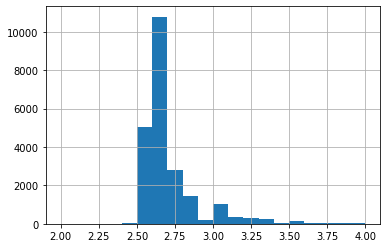

In [62]:
df['ceiling_height'].hist(bins=20, range = (2, 4))

*Подавляющее большинство жилья с потолками 2,7 м - более 13 тыс. предложений, много и с высотой в районе 2,5 м - около 5 тыс. Есть характерный провал до 3 м и далее подъем выше 3 м - влияние частных домов и котеджей*

**Этаж и типы этажей**

<AxesSubplot:>

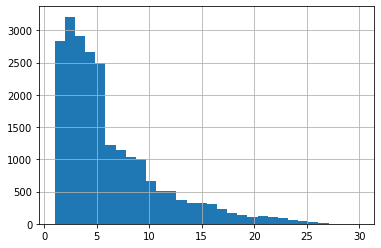

In [63]:
df['floor'].hist(bins=30, range = (1, 30))

*2й , 3й и 1й этажи лидеры предложений - 3,3; 2,9 и 2,8 тыс. соответственно, 4й и 5й - 2,7 и 2,5 тыс.. Далее присходит падение предложений, следствие массовой застройки пятиэтажками в прошлом*

<AxesSubplot:>

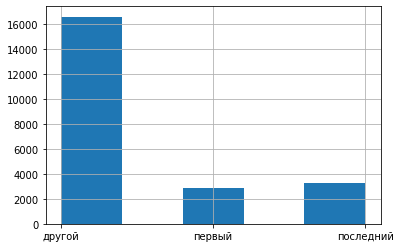

In [64]:
df['floor_type'].hist(bins=5)

*Подавляющая часть предложений, 17 тыс. в промежутке между первым и последним, которых 3 и 3,5 тыс. соответственно*

**Общее количество этажей в доме**

<AxesSubplot:>

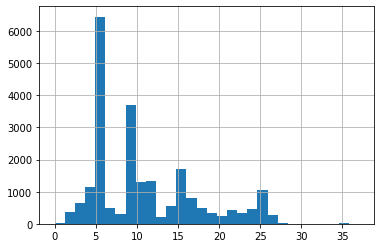

In [65]:
df['floors_total'].hist(bins=30, range = (0, 37))

*Ожидаемо большая часть предложений в пятиэтажных домах 6.7 тыс.,далее с 4 тыс. панельные девятиэтажки - 1,5 тыс.. Более современные дома имеют 16 и 24 этажа, 2.1 и 1,6 тыс. соответственно. Заметно появление "высотных" предложений в 35 этажных домах*

**Расстояние до центра города**

<AxesSubplot:>

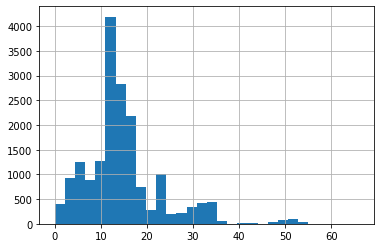

In [66]:
df['city_centers_nearest'].hist(bins=30)

*12-17 км. до центра - основная часть предложений к покупке, более 7 тыс.. Можно найти и поближе, в радиусе 2 км, 300 предложений, более - 3 тыс. объектов с расстоянием от 3 до 10 км.*

**Расстояние до ближайшего аэропорта**

<AxesSubplot:>

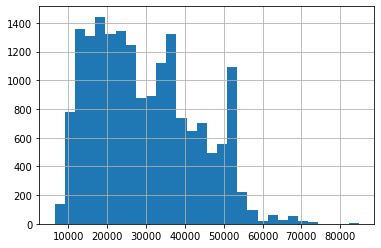

In [67]:
df['airports_nearest'].hist(bins=30)

*Большинство предложений от 12 до 25 км, после снижения идут всплески на 35 и 50 км - здесь либо влияние котеджных поселков, либо продавцы указали расстояние до другого аэропорта*

**Расстояние до ближайшего парка**

<AxesSubplot:>

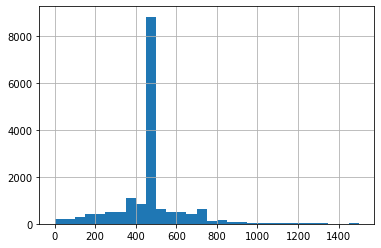

In [68]:
df['parks_nearest'].hist(bins=30, range = (0, 1500))

*Почти половина  предложений с парками в радиусе 500 метров*

**День и месяц публикации объявления**

<AxesSubplot:>

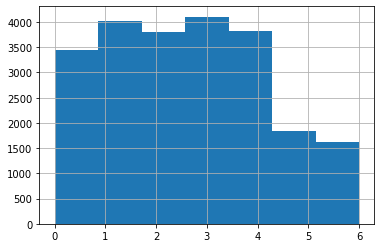

In [69]:
df['weekday'].hist(bins=7)

*Вторник и четверг - самые высокие дни подача объявлений, в понедельник, среду и пятницу немногим меньше. На выходные, в два раза реже заняты продажей**

<AxesSubplot:>

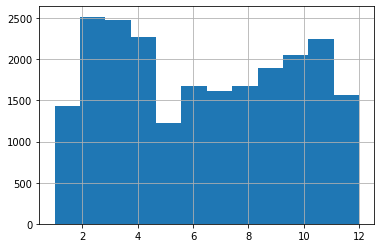

In [70]:
df['month'].hist(bins=12)

*Февраль, март и апрель - пик активных продаж, следующий начинается в сентябре. В мае и на Новый год другие заботы* 

<p>
<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

    
Молодец 👍</div>

**4.3 ПЕРИОДЫ ПРОДАЖИ ЖИЛЬЯ**

<AxesSubplot:>

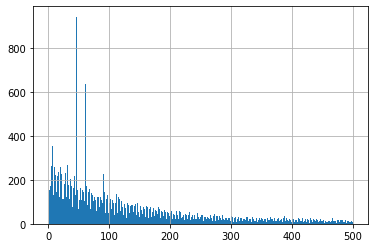

In [71]:
df['days_exposition'].hist(bins=300, range = (0, 500), grid=True)

In [72]:
df['days_exposition'].value_counts().head(15)

45.0    856
60.0    530
7.0     224
30.0    201
4.0     172
90.0    158
3.0     153
14.0    144
5.0     143
20.0    138
9.0     132
11.0    132
44.0    131
8.0     131
10.0    126
Name: days_exposition, dtype: int64

In [73]:
df['days_exposition'].describe()

count    19717.000000
mean       179.008115
std        217.888554
min          1.000000
25%         45.000000
50%         95.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

*На гигтограмме и числовых данных видим пики продаж на 45 , 60 и 90 день, это скорее всего связано с выгодными условиями закрытия сделок не позже этих дней или особенностями настройки программного обеспечения. Есть закономерность: большая часть продаж происходит до 200 дней. Но картина нечеткая, видимо данные по продажам дорогостояшего жилья сильно искажают остальные. Сделаем срез по квартирам с количеством комнат не более трех* 

In [74]:
rooms_3 = df[df['rooms'] <= 3]

<AxesSubplot:>

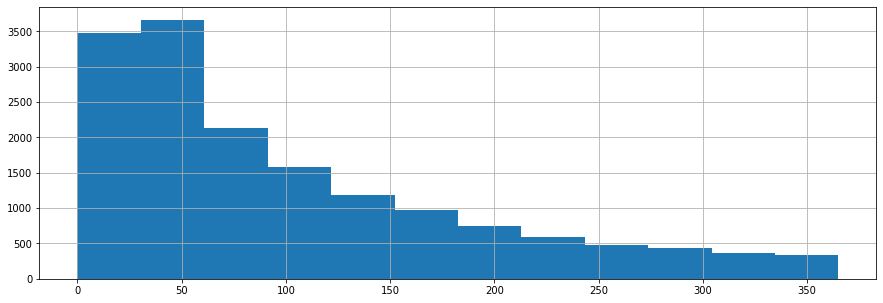

In [75]:
rooms_3['days_exposition'].hist(bins=12, range = (0, 365), grid=True, figsize=(15, 5))

In [76]:
rooms_3['days_exposition'].describe()

count    18536.000000
mean       173.642479
std        212.344854
min          1.000000
25%         44.000000
50%         92.000000
75%        219.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [77]:
rooms_3.query('days_exposition < 183')['days_exposition'].mean()

67.64548880855318

*Большая часть квартир до 3х комнат продаются в течение двух месяцев. Проверим 2х и 1 комнатные* 

<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>

"90% не более 6 месяцев." – поясни, пожалуйста, как ты это определил

<div class="alert alert-info">Удалил
<b>

<p>
<div class="alert-success">
<b>Комментарий ревьюера 2 ✔️</b>

    
:)</div>

In [78]:
rooms_2 = df[df['rooms'] == 2]
rooms_1 = df[df['rooms'] == 1]

<AxesSubplot:>

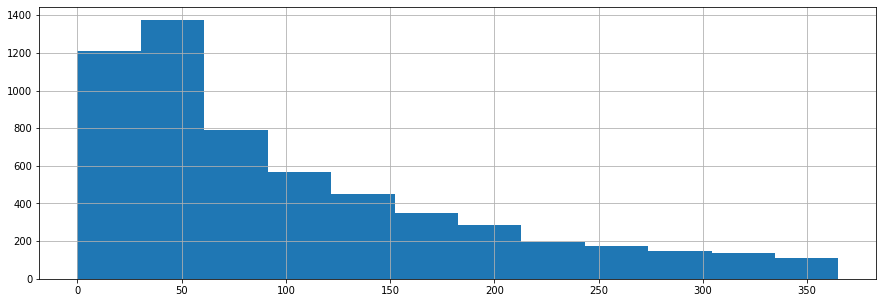

In [79]:
rooms_2['days_exposition'].hist(bins=12, range = (0, 365), grid=True, figsize=(15, 5))

<AxesSubplot:>

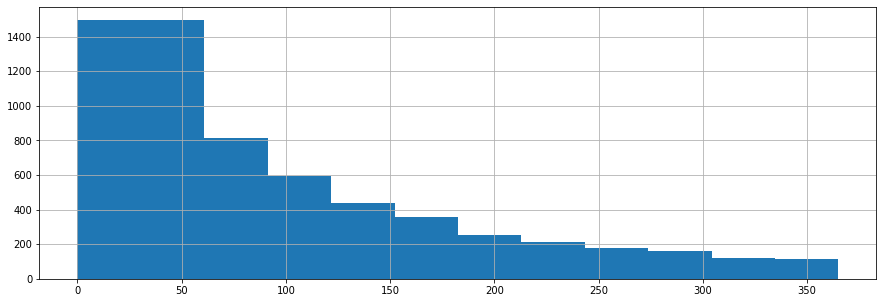

In [80]:
rooms_1['days_exposition'].hist(bins=12, range = (0, 365), grid=True, figsize=(15, 5))

*Продажи до 1 месяца являются быстрыми, средний срок продажи 1 комнатных квартир - 1,5 мес., 2х комнатных - 2 мес. Если предположить что риэлторы получают преференции при закрытии сделок до 45 и 60 дней, то это объясняет пики продаж на 45 и 60 днях. Трехкомнатные квартиры продаются до полугода, но большая часть в течение 3х месяцев( пик 90 дней). Недвижимость с количеством комнат больше 3х, продается полгода-год.\
 Причиной долгих продаж являются завышенные ожидания продавцов, как следствие высокая неконкурентная цена. Долгая продажа для квартир не более 3 х комнат, +50% времени указанного выше *  

<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>
    
Отлично! А долгими продажами что можно назвать?</div>

<p>
<div class="alert-success">
<b>Комментарий ревьюера 2 ✔️</b>

    
👍</div>

**4.4 ФАКТОРЫ ПОЛНОЙ СТОИМОСТИ ОБЪЕКТА НЕДВИЖИМОСТИ**

**Зависимость цены объекта от общей площади**

*Учтем: период продажи жилой недвижимости, с учетом многокомнатного, не больше года. В противном случае условия продажи не конкурентноспособны (высокая стоимость, ветхость здания и др.)Сделаем срез данных меньше года*

<AxesSubplot:xlabel='total_area'>

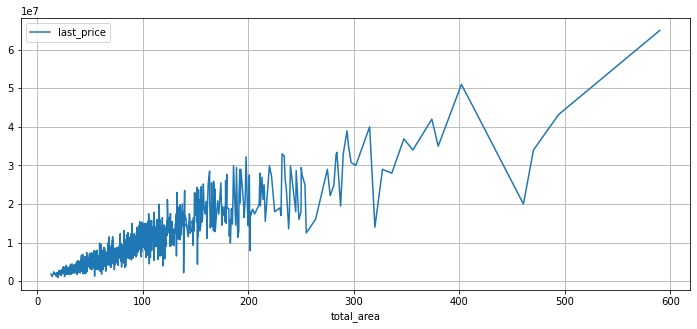

In [81]:
df.query('days_exposition  < 365').pivot_table(index='total_area', values='last_price', aggfunc='mean').plot(grid=True, figsize=(12, 5))

*Ожидаемая закономерность роста стоимости жилья от общей площади наблюдается до 200 м2, далее хоть и наблюдается общий рост стоимости, но есть и спады, заметные после "круглых" чисел 200, 300 и 400 м2*

*Взаимосвязь стоимости от общей площади покажет коэффициент корреляции:*

In [82]:
df['total_area'].corr(df['last_price'])

0.8533237399171009

*Коэффициент мог быть еще выше, при условии общей площади до 200 м2. Построим график удовлетворяющий и этому условию*

<AxesSubplot:xlabel='total_area'>

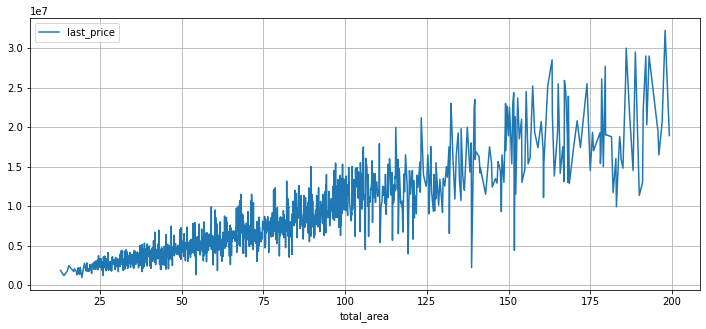

In [83]:
df.query('days_exposition  < 365 and total_area < 200').pivot_table(index='total_area', values='last_price', aggfunc='mean').plot(grid=True, figsize=(12, 5))

*Действительно, взаимосвязь выше*

*Недвижимость площадью более 200 м2 является нетиповой и требует отдельного тщательного исследования (не в рамках этого проекта).*

<p>
<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

    
👍</div>

**Зависимость цены объекта от жилой площади**

<AxesSubplot:xlabel='living_area'>

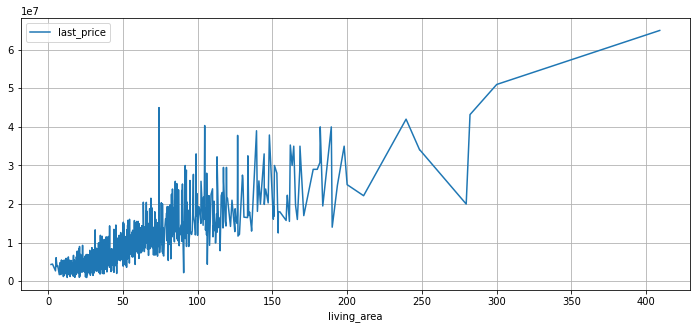

In [84]:
df.query('days_exposition  < 365').pivot_table(index='living_area', values='last_price', aggfunc='mean').plot(grid=True, figsize=(12, 5))

*Взаимосвязь так же прослеживается, но "круглые" числа поменяись на 75, 110, 150, 200, 240 и 300. Есть пик на 75 м2.* 

In [85]:
df['living_area'].corr(df['last_price'])

0.7716502045267568

*Взаимомосвязь между жилой площадью и стоимостью высокая, но ниже зависимости от общей площади на 13,8%*

<p>
<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

    
👍</div>

**Зависимость цены объекта от площади кухни**

<AxesSubplot:xlabel='kitchen_area'>

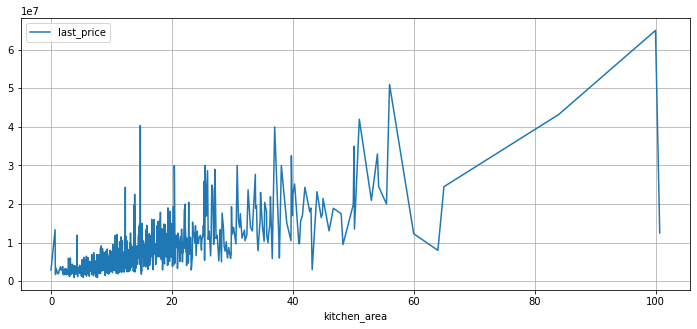

In [86]:
df.query('days_exposition  < 365').pivot_table(index='kitchen_area', values='last_price', aggfunc='mean').plot(grid=True, figsize=(12, 5))

*Видим  зависимость до 25 м2, затем она меняется. Провалы после 37, пики на 52 и 57 м2, и вновь  зависимость с 70 м2**

In [87]:
df['kitchen_area'].corr(df['last_price'])

0.6398167532166609

*Коэффициент ожидаемо ниже, на 30,8% в сравнении с коэффициентом общей площади*

<p>
<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

    
👍</div>

**Зависимость цены объекта от количества комнат**

<AxesSubplot:xlabel='rooms'>

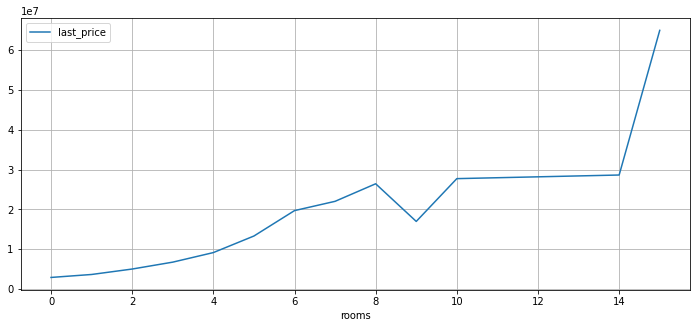

In [88]:
df.query('days_exposition  < 365').pivot_table(index='rooms', values='last_price', aggfunc='mean').plot(grid=True, figsize=(12, 5))

In [89]:
df['rooms'].corr(df['last_price'])

0.5846627816878823

*Прослеживается зависимость роста цены от количества комнат, причем при 4 и выше растет стоимость сильнее,до 8 комнат. Влияют многокомнатные квартиры более высокого ценового сегмента. После наблюдается спад, с ростом после 14 комнат (премиум сегмент).*

<p>
<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

    
👍 Здесь тоже можно посчитать коэффициент корреляции </div>

**Зависимость цены объекта от типа этажа**

<AxesSubplot:xlabel='floor_type'>

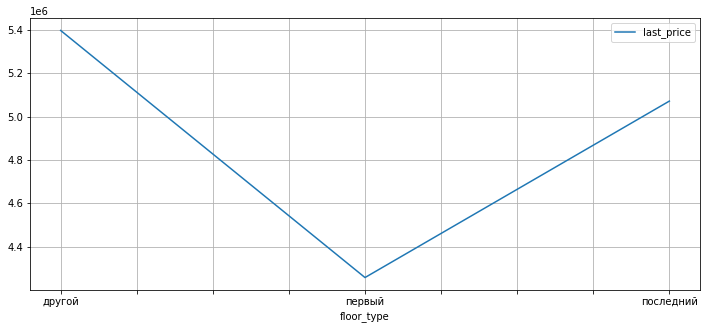

In [90]:
df.query('days_exposition  < 365').pivot_table(index='floor_type', values='last_price', aggfunc='mean').plot(grid=True, figsize=(12, 5))

In [91]:
df = df.query('days_exposition  < 365')

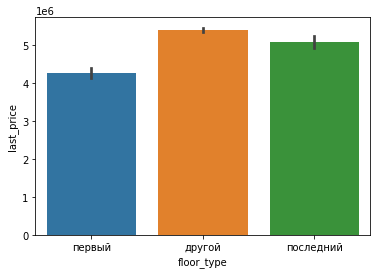

In [92]:
seaborn.barplot(x='floor_type', y='last_price', data=df);


*Первые этажи ценятся гораздо ниже последних. Самая высокая стоимость у категории "другие" (между первым и последним).*

<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>

Барплоты подойдут лучше для отпределения зависимости цены от типа этажа, дня недели, года и месяца.
    
Схема для выбора визуализации в зависимости от задач:
    
    
https://extremepresentation.typepad.com/.a/6a00d8341bfd2e53ef0111683a7591970c-pi

</div>

<div class="alert alert-info">
<b>
Оставил графики для наглядности

<p>
<div class="alert-success">
<b>Комментарий ревьюера 2 ✔️</b>

    
👍</div>

**Взаимосвязь стоимости от даты размещения**

<AxesSubplot:xlabel='weekday'>

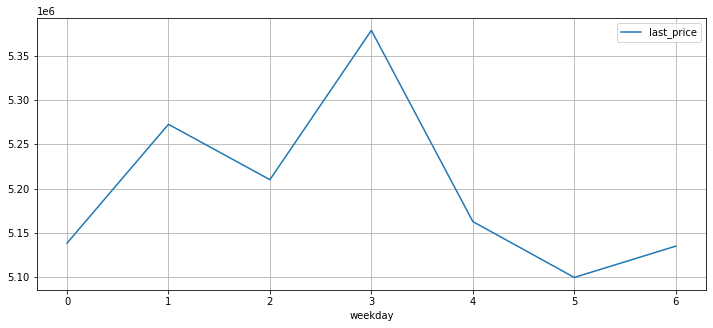

In [93]:
df.query('days_exposition  < 365').pivot_table(index='weekday', values='last_price', aggfunc='mean').plot(grid=True, figsize=(12, 5))

<AxesSubplot:xlabel='weekday', ylabel='last_price'>

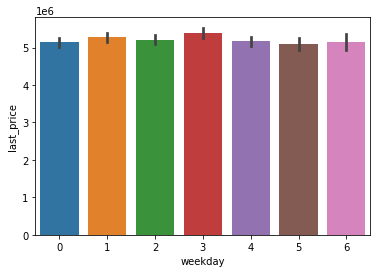

In [94]:
seaborn.barplot(x='weekday', y='last_price', data=df)

*В четверг назначают самые высокие цены, во вторник чуть ниже. Самые низкие в субботу и воскресенье.*

<p>
<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

    
👍</div>

<AxesSubplot:xlabel='month'>

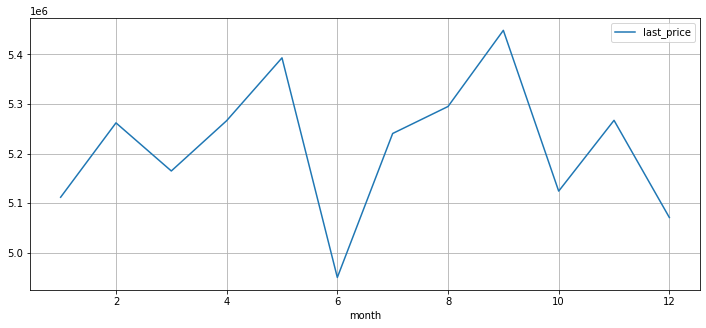

In [95]:
df.query('days_exposition  < 365').pivot_table(index='month', values='last_price', aggfunc='mean').plot(grid=True, figsize=(12, 5))

<AxesSubplot:xlabel='month', ylabel='last_price'>

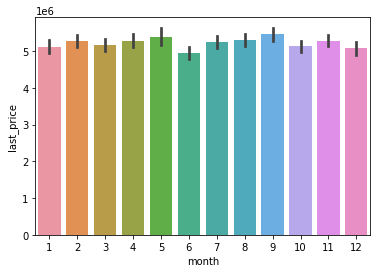

In [96]:
seaborn.barplot(x='month', y='last_price', data=df)

*Высокий сезон продаж начинается в августе, достигает пика в конце сентября. Со второй декады января так же наблюдается оживление, с небольшим спадом в марте и пиком в конце апреля, начале мая. В июне рынок жилья в самом низу.*

<p>
<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

    
👍</div>

<AxesSubplot:xlabel='year'>

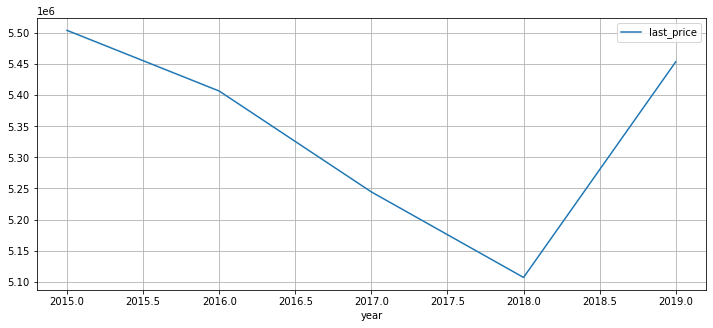

In [97]:
df.query('days_exposition  < 365').pivot_table(index='year', values='last_price', aggfunc='mean').plot(grid=True, figsize=(12, 5))

<AxesSubplot:xlabel='year', ylabel='last_price'>

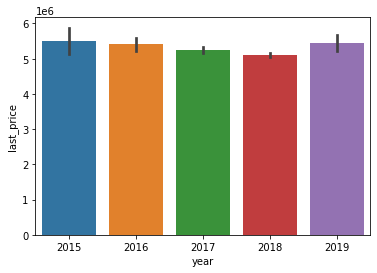

In [98]:
seaborn.barplot(x='year', y='last_price', data=df)#

*В период с начала 2015 года наблюдалось снижение стоимости жилья до конца 2017 года. В 2018 стоимость начала быстро расти.* 

*Рассмотрим взаимозависимость цены за кв.м и года*

<AxesSubplot:xlabel='year', ylabel='price_meter'>

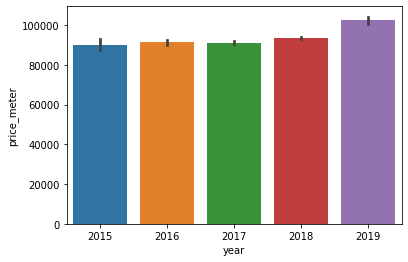

In [99]:
seaborn.barplot(x='year', y='price_meter', data=df)

*Цена квадратного метра показала небольшой рост в 2016 и 2018 годах. В 2019 рост цены за м2 заметно ускорился*

<p>
<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

    
Можно еще посмотреть взаимозависимость цены за кв.м и года </div>

**4.5 Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений**

In [100]:
df['locality_name'].value_counts().head(10)

Санкт-Петербург    11020
 Мурино              486
 Шушары              363
Всеволожск           284
Колпино              273
 Парголово           261
Пушкин               260
 Кудрово             246
Гатчина              218
Выборг               177
Name: locality_name, dtype: int64

In [101]:
name_top = df['locality_name'].value_counts().head(10).index

In [102]:
name_top

Index(['Санкт-Петербург', ' Мурино', ' Шушары', 'Всеволожск', 'Колпино',
       ' Парголово', 'Пушкин', ' Кудрово', 'Гатчина', 'Выборг'],
      dtype='object')

In [103]:
name_top = ['Санкт-Петербург', ' Мурино', ' Шушары', 'Всеволожск', 'Колпино',
       ' Парголово', 'Пушкин', ' Кудрово', 'Гатчина', 'Выборг']

<div class="alert-warning">
<b>Комментарий ревьюера 3 ⚠️</b>

Вот эту строчку можно удалить, у тебя строчкой выше уже список сохранен

</div>

In [104]:
#name_top = ['Санкт-Петербург', ' Мурино', ' Шушары', 'Всеволожск', 'Пушкин', 'Колпино', ' Парголово', 'Гатчина', ' Кудрово', 'Выборг']

<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>
    
Старайся не писать вручную, а обращаться к переменным, так мы автоматизируем код и будет меньше вероятность ошибки

<div class="alert alert-info"> Спасибо, а ведь оставалось совсем чуть чуть....
<b>


<p>
<div class="alert-success">
<b>Комментарий ревьюера 2 ✔️</b>

В данном случае список городов через index можно вывести:
    
    
    name_top = df['locality_name'].value_counts().head(10).index

</div>

In [105]:
df_top = df.query('locality_name == @name_top')

In [106]:
df_top.pivot_table(index='locality_name', values='price_meter', aggfunc='mean').sort_values(by='price_meter', ascending=False)

,price_meter
locality_name,
Санкт-Петербург,104936.432759
Пушкин,100526.246154
Кудрово,92487.861789
Парголово,88930.455939
Мурино,85940.574074
Шушары,78290.933884
Колпино,74460.047619
Гатчина,68750.683486
Всеволожск,67206.232394


<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>
    
Лучше тут сразу отсортировать по убыванию

<p>
<div class="alert-success">
<b>Комментарий ревьюера 2 ✔️</b>

Для сортировки можно использовать `sort_values`:


    df_top.pivot_table(index='locality_name', values='price_meter', aggfunc='mean').sort_values(by='price_meter', ascending=False)

<div class="alert alert-info">Мне еще не хватает "гибкости" мышления =)
<b>


<p>
<div class="alert-success">
<b>Комментарий ревьюера 3 ✔️</b>

    
С опытом придет :)</div>

<AxesSubplot:xlabel='locality_name'>

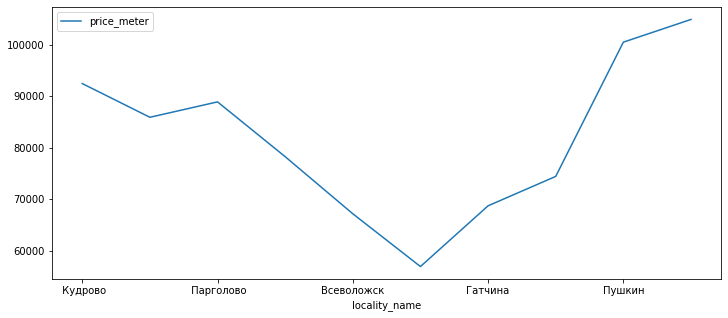

In [107]:
df_top.pivot_table(index='locality_name', values='price_meter', aggfunc='mean').plot(figsize=(12, 5))

In [108]:
plt.figure(figsize=(5, 20))

<Figure size 360x1440 with 0 Axes>

<Figure size 360x1440 with 0 Axes>

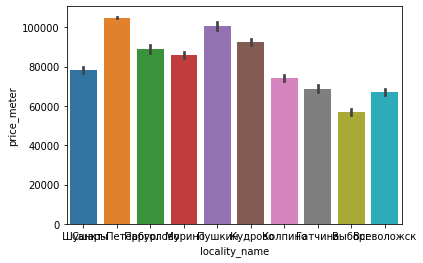

In [109]:
seaborn.barplot(x='locality_name', y='price_meter', data=df_top,)
seaborn.set(rc={'figure.figsize':(15,7)})

<div class="alert-warning">
<b>Комментарий ревьюера ⚠️</b>
    
Сюда тоже подойдет лучше барплот

<p>
<div class="alert-success">
<b>Комментарий ревьюера 2 ✔️</b>

Вот так можно:

    seaborn.barplot(x='locality_name', y='price_meter', data=df_top,)
    seaborn.set(rc={'figure.figsize':(16,10)})

<div class="alert alert-info">
<b>
Отличный вид!   (перезапускал несколько раз - seaborn.set путал стороны)

*Ожидаемо самая высокая средняя стоимость 106645 руб/м2 в Санкт-Петербурге, минимальная в Выборге 57934 руб/м2*

<p>
<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

    
👍</div>

**4.6 Зависимость цены недвижимости от расстояния до центра города**

*Построим график средней стоимости жилья в зависимости от расстояния до центра*

<AxesSubplot:xlabel='city_centers_nearest'>

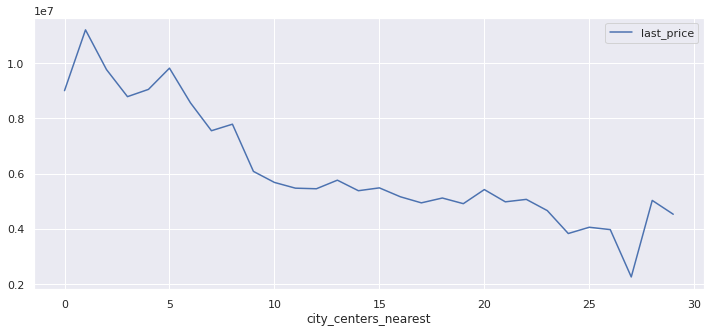

In [110]:
df.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_centers_nearest', values='last_price', aggfunc='mean').plot(grid=True, figsize=(12, 5))

*Взаимосвязь полной стоимости от расстояния до центра покажет коэффициент корреляции. Для удобства дабавим переменную df_sp со срезом объектов по Санкт-Петербургу*  

In [111]:
df_sp = df.query('locality_name == "Санкт-Петербург"')
df_sp['city_centers_nearest'].round()

4         8.0
9        15.0
10       14.0
15       14.0
18       11.0
         ... 
23686    12.0
23687    17.0
23688    14.0
23689    16.0
23690     6.0
Name: city_centers_nearest, Length: 11020, dtype: float64

In [112]:
df_sp['city_centers_nearest'].corr(df_sp['last_price'])

-0.36395037630227645

*Коэффициент корреляции отрицательный, показываетчто с ростом расстояния от центра цена падает*

*Построим график средней стоимости м2 жилья в зависимости от расстояния до центра*

<AxesSubplot:xlabel='city_centers_nearest'>

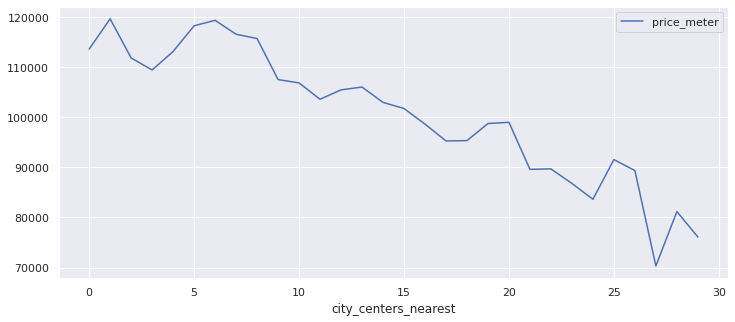

In [113]:
df.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_centers_nearest', values='price_meter', aggfunc='mean').plot(grid=True, figsize=(12, 5))

In [114]:
df_sp['city_centers_nearest'].corr(df_sp['price_meter'])

-0.2935292701296597

*Зависимость снижения цены м2 от увеличения расстояния до центра, меньше чем общей стоимости*

<p>
<div class="alert-danger">
<b>Комментарий ревьюера ❌</b> 
    
Нужно округлить значения до целого км, тогда график будет удобно интерпретировать

<p>
<div class="alert-danger">
<b>Комментарий ревьюера 2 ❌</b> 
    
Округление не сохранилось, ты не перезаписал переменную

</div>

<div class="alert alert-info">
<b>
Переделал, перезаписал и график стал нагляднее

<p>
<div class="alert-success">
<b>Комментарий ревьюера 3 ✔️</b>

    
👍</div>

### Общий вывод

**Предобработка данных: 
Больше всего пропусков допущено продавцами квартир при составлении объявлений и связано с отсутствием некоторых характеристик (не придали значения, не помнят, и т.д.) продаваемого жилья: при 100% заполнении total_area, в столбцах жилая площадь, площадь кухни (living_area, kitchen_area) есть пропуски. Еще больше в высоте потолков и количестве балконов (ceiling_height, balcony) - во всех мы нашли закономерности и дополнили недостающие данные.\
Апартаменты (is_apartment) объекты коммерческой недвижимости без воможности оформления постоянной регистрации нас интересуют в меньшей степени. Парки и пруды в радиусе 3 км, повышают стоимость жилья, если не указаны, то вероятно их и нет.\
Картографические данные (airports_neares, cityCenters_nearest, parks_nearest и ponds_nearest) автоматически подгружаются при указании локации продаваемого жилья, здесь вопрос к програмному обесечению или выгрузке-передаче данных\
Апартаменты (жильё без возможности прописаться) и квартиры свободной планировки (требующие финансовых вложений) нерелевантны и составляют в сумме 0.49% от общего количества исследуемых квартир, следовательно не представляют ценности для нашего анализа.\
Общая площадь:
В продаже недвижимость общей площадью от 13 до 590 м2, в основном продается жилье от 40 до 60 м2. Среднее и медианное значение общей площади 58 и 51 м2 соответственно.\
Жилая площадь:\
В продаже недвижимость жилой площадью от 19 до 409 м2, в основном продается жилье от 20 до 30 м2.Среднее и медианное значение общей площади 33 и 30 м2 соответственно.\
Площадь кухни:\
Большая часть кухонь имеет площадь 8-10 м2, среднее 10 и медиана 9 м2.\
Цена объектов:\
Цена большей части квартир 3,5 - 5 млн. руб., средняя и медиана 5,549 и 4,550 млн.руб..\
Количество комнат:\
Более 7,8 тыс. предложений 1 комнатных квартир, немногим меньше - 7,6 тыс. двухкомнатных, далее 5,5 тыс. трех и чуть больше тысячи четырехкомнатных квартир, студий немного,как и пятикомнатных.\
Высота потолков:\
Подавляющее большинство жилья с потолками 2,7 м - более 13 тыс. предложений, много и с высотой в районе 2,5 м - около 5 тыс. Есть характерный провал до 3 м и далее подъем выше 3 м - влияние частных домов и коттеджей.\
Этаж и типы этажей:\
2й , 3й и 1й этажи лидеры предложений - 3,3; 2,9 и 2,8 тыс. соответственно, 4й и 5й - 2,7 и 2,5 тыс..
Подавляющая часть предложений, 17 тыс. в промежутке между первым и последним, которых 3 и 3,5 тыс. соответственно.\
Общее количество этажей в доме:\
Ожидаемо большая часть предложений в пятиэтажных домах 6.7 тыс.,далее с 4 тыс. панельные девятиэтажки - 1,5 тыс.. Более современные дома имеют 16 и 24 этажа, 2.1 и 1,6 тыс. соответственно. Заметно появление "высотных" предложений в 35 этажных домах.\
Расстояние до центра города:
12-17 км. до центра - основная часть предложений к покупке, более 7 тыс.. Можно найти и поближе, в радиусе 2 км, 300 предложений, более - 3 тыс. объектов с расстоянием от 3 до 10 км.\
Расстояние до ближайшего аэропорта:
Большинство предложений от 12 до 25 км, после снижения идут всплески на 35 и 50 км - здесь либо влияние коттеджных поселков, либо продавцы указали расстояние до другого аэропорта.\
Расстояние до ближайшего парка:\
Почти половина предложений с парками в радиусе 500 метров.\
День и месяц публикации объявления:\
Вторник и четверг - самые высокие дни подача объявлений, в понедельник, среду и пятницу немногим меньше. На выходные, в два раза реже заняты продажей.\
Февраль, март и апрель - пик активных продаж, следующий начинается в сентябре. В мае и на Новый год падение.\
ПЕРИОДЫ  ПРОДАЖИ ЖИЛЬЯ:\
Пики продаж на 45 , 60 и 90 день подачи объявления, это скорее всего связано с выгодными условиями закрытия сделок, не позже этих дней или особенностями настройки программного обеспечения. Есть закономерность: большая часть продаж происходит до 200 дней. Но картина нечеткая, видимо данные по продажам дорогостоящего жилья сильно искажают остальные данные.
Большая часть квартир до 3 х комнат продаются в течение двух месяцев, 90% не более 6 месяцев.\
Продажи до 1 месяца являются быстрыми, средний срок продажи 1 комнатных квартир - 1,5 мес., 2х комнатных - 2 мес. Трехкомнатные квартиры продаются до полугода, но большая часть в течение 3х месяцев ( пик 90 дней). Недвижимость с количеством комнат больше 3х, продается полгода-год.**\

**ФАКТОРЫ ПОЛНОЙ СТОИМОСТИ ОБЪЕКТА НЕДВИЖИМОСТИ
Зависимость цены объекта от общей площади:\
Ожидаемая закономерность роста стоимости жилья от общей площади наблюдается до 200 м2, далее хоть и наблюдается общий рост стоимости, но есть и спады, заметные после "круглых" чисел 200, 300 и 400 м2\
Недвижимость площадью более 200 м2 является нетиповой и требует отдельного тщательного исследования (не в рамках этого проекта)\
Зависимость цены объекта от жилой площади:\
Взаимосвязь так же прослеживается, но "круглые" числа поменялись на 75, 110, 150, 200, 240 и 300. Есть пик на 75 м2.
Взаимосвязь между жилой площадью и стоимостью высокая, но ниже зависимости от общей площади на 13,8%.
Зависимость цены объекта от площади кухни:\
Видим зависимость до 25 м2, затем она меняется. Провалы после 37, пики на 52 и 57 м2, и вновь зависимость с 70 м2.
Коэффициент корреляции ниже, на 30,8% в сравнении с коэффициентом общей площади.\
Зависимость цены объекта от количества комнат:\
Прослеживается зависимость роста цены от количества комнат, причем при 4 и выше растет стоимость сильнее, до 8 ми комнат. Влияют многокомнатные квартиры более высокого ценового сегмента. После наблюдается спад, с ростом после 14 комнат (премиум сегмент)\
Зависимость цены объекта от типа этажа:\
Первые этажи ценятся гораздо ниже последних. Самая высокая стоимость у категории "другие" (между первым и последним).
Взаимосвязь стоимости от даты размещения:\
В четверг назначают самые высокие цены, во вторник чуть ниже. Самые низкие в субботу и воскресенье.\
Высокий сезон продаж начинается в августе, достигает пика в конце сентября. Со второй декады января также наблюдается оживление, с небольшим спадом в марте и пиком в конце апреля, начале мая. В июне рынок жилья в самом низу.\
В период с начала 2015 года наблюдалось снижение стоимости жилья до конца 2017 года. В 2018 стоимость начала быстро расти, но на момент среза данных 2019 года, уровень 2018 достигнут не был.\
Средняя цена одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений:\
Ожидаемо самая высокая средняя стоимость 106645 руб/м2 в Санкт-Петербурге, минимальная в Выборге 57934 руб/м2 (таблица с ценами в разделе 4.5).\
Зависимость цены недвижимости от расстояния до центра города:
Коэффициент корреляции отрицательный (-0.374), показывает  что с ростом расстояния от центра цена падает. Зависимость снижения цены м2 от увеличения расстояния до центра, меньше чем от общей стоимости.**

<p>
<div class="alert-success">
<b>Комментарий ревьюера ✔️</b>

    
Стоит еще добавить про то, какие были данные и какая предобработка.  </div>

<p>
<div class="alert-success">
<b>Комментарий ревьюера 2 ✔️</b>

    
👍</div>

<div class="alert alert-info">
<b>
Какой хороший анализ получился =), с твоей помощью. Спасибо</b>
<br>
</div>


<p>
<div class="alert-success">
<b>Комментарий ревьюера 3 ✔️</b>

    
Мне очень приятно 🥰 </div>

<div style="border:solid green 3px; padding: 20px">

**Общий вывод по проекту**

Андрей, спасибо за проделанную работу. Мне понравился твой подход, ты большой молодец! Есть несколько важных моментов, которые я отметила и которые можно было бы улучшить, подсказки ты найдешь в моих комментариях. 


**Что нужно переделать, чтобы я приняла твой проект🤓**:
    

* Переделать обработку пропущенных значений в некоторых столбцах
* Поправить пункт "как стоимость объектов зависит от расстояния до центра города."
* После исправлений пересмотреть зависимости и переписать выводы.

**Рекомендации ты найдешь в моих комментариях!**
    
Полезная ссылка про графики:

https://habr.com/ru/post/468295/

и еще одна

https://pyprog.pro/mpl/mpl_short_guide.html


**Желаю удачи и жду твой проект на повторное ревью!**😉

<div style="border:solid green 3px; padding: 20px">

**Общий вывод по проекту 2**
    
Андрей, спасибо за исправления и комментарии! Поправь, пожалуйста, еще пару моментов:
    
- Ошибка в формуле заполнения пропусков площади кухни, на коэффициент нужно поделить, а не умножить
- Округление расстояния до центра в км не сохранилось, ты не перезаписал переменную

<div style="border:solid green 3px; padding: 20px">

**Общий вывод по проекту 3**

Андрей,  поздравляю со сдачей проекта!  🎉 🎉 🎉

Советую тебе бесплатный курс по статистике, можно посмотреть отдельно интересующие тебя темы:

https://stepik.org/course/76/

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод